In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/abalone_data.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole_height,Shucked_height,Viscera_height,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df['Ages'] = df.Rings + 1.5

In [7]:
selected_col = ['Length', 'Diameter', 'Height', 'Whole_height', 'Ages']

In [8]:
df2 = df[selected_col]

In [9]:
df2.head()

,Length,Diameter,Height,Whole_height,Ages
0,0.455,0.365,0.095,0.5140,16.5
1,0.350,0.265,0.090,0.2255,8.5
2,0.530,0.420,0.135,0.6770,10.5
3,0.440,0.365,0.125,0.5160,11.5
4,0.330,0.255,0.080,0.2050,8.5


In [10]:
skew_columns = (df2[selected_col].skew().sort_values(ascending=False))
skew_columns2 = skew_columns.loc[skew_columns > 0.75]
skew_columns

Height          3.128817
Ages            1.114102
Whole_height    0.530959
Diameter       -0.609198
Length         -0.639873
dtype: float64

<AxesSubplot:xlabel='Ages', ylabel='Height'>

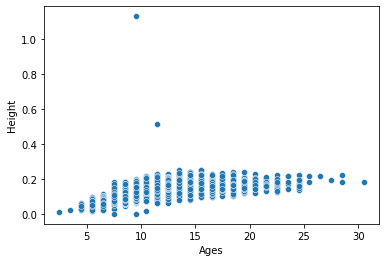

In [11]:
sns.scatterplot(x=df2.Ages, y=df2.Height)

In [12]:
df2 = df2[df2.Height < 0.4]

In [13]:
skew_columns = (df2[selected_col].skew().sort_values(ascending=False))
skew_columns2 = skew_columns.loc[skew_columns > 0.75]
skew_columns

Ages            1.113615
Whole_height    0.528732
Height         -0.264536
Diameter       -0.609823
Length         -0.640423
dtype: float64

<AxesSubplot:xlabel='Ages', ylabel='Count'>

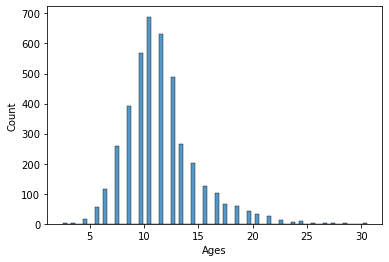

In [14]:
sns.histplot(df2.Ages)

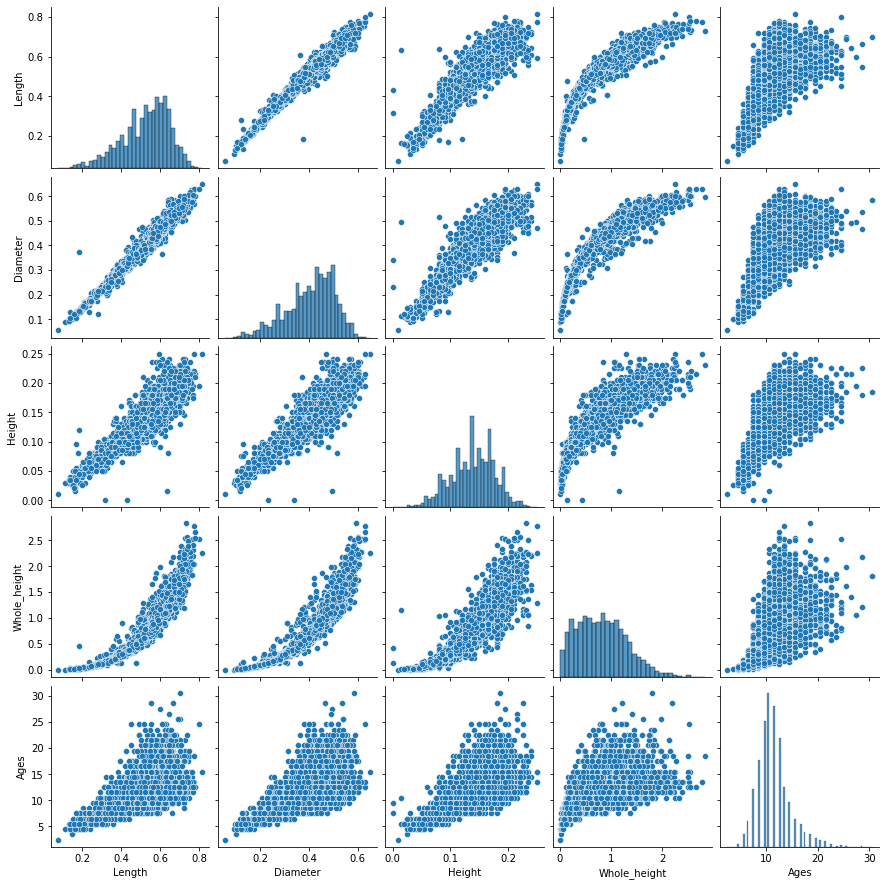

In [15]:
sns.pairplot(df2)

<AxesSubplot:xlabel='Ages', ylabel='Height'>

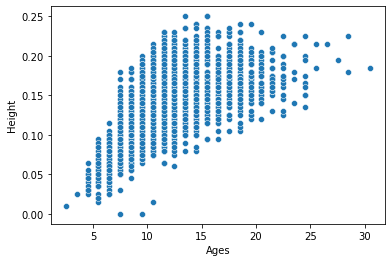

In [16]:
sns.scatterplot(x=df2.Ages, y=df2.Height)

<AxesSubplot:xlabel='Ages', ylabel='Length'>

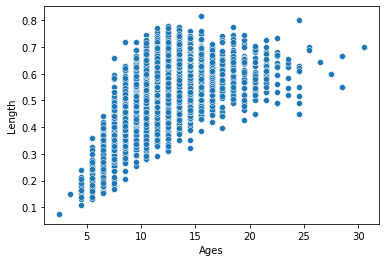

In [17]:
sns.scatterplot(x=df2.Ages, y=df2.Length)

In [19]:
df_x =df2.drop('Ages', axis=1)

In [22]:
df_y = df2[['Ages']]

In [18]:
from sklearn.model_selection import train_test_split

In [24]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.25, random_state=42)

In [25]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3131, 4) (1044, 4) (3131, 1) (1044, 1)


In [26]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [27]:
train_x_scl = scl.fit_transform(train_x)

In [28]:
test_x_scl = scl.transform(test_x)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(train_x_scl, train_y)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
def evaluation(model, model_name):
    train_pred = model.predict(train_x_scl)
    test_pred = model.predict(test_x_scl)
    print(f'Model test MSE : {mean_squared_error(test_y, test_pred)}')
    train_rmse = mean_squared_error(train_y, train_pred, squared=False)
    test_rmse = mean_squared_error(test_y, test_pred, squared=False)
    
    print(f'Model: {model_name}')
    print(f'Train RMSE    : {train_rmse}')
    print(f'Test RMSE     : {test_rmse}')

In [34]:
evaluation(lin_reg, 'Linear Regression')

Model test MSE : 6.244819515795199
Model: Linear Regression
Train RMSE    : 2.5477963985713026
Test RMSE     : 2.498963688370681


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [36]:
ridge = Ridge()

parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10, 20]}

In [37]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv=5)
ridge_regressor.fit(train_x_scl, train_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_root_mean_squared_error')

In [38]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 1}
2.5527802706084493


In [39]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(train_x_scl, train_y)

Ridge(alpha=1)

In [40]:
evaluation(ridge_reg, 'Ridge Reg with few features')

Model test MSE : 6.243124299455506
Model: Ridge Reg with few features
Train RMSE    : 2.5478080167893595
Test RMSE     : 2.498624481480862
